In [13]:
import numpy as np
import torch
from model import *
from train import *
import pickle
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def plot_result(
        r_list, 
        x_var,
        y_var,
        title,
        y_label,
        x_label,
        show_bound=True,
        conf=True):
    o = 20

    fig, ax1 = plt.subplots()
    x_list = [c[x_var] for c in r_list]
    y_list = [c[y_var] for c in r_list]

    if conf:
        y_means = [np.mean(y) for y in y_list]
        y_std = [np.std(y, ddof=1) / np.sqrt(len(y)) for y in y_list]  # Standard error of the mean
        y_upper = [m + s*1.96 for m, s in zip(y_means, y_std)]
        y_lower = [m - s*1.96 for m, s in zip(y_means, y_std)]

        ax1.plot(x_list, y_means, label=y_label, color='blue')
        ax1.fill_between(x_list, y_lower, y_upper, color='blue', alpha=0.2, label='CI')
        ax1.set_xlabel(x_label)
        ax1.set_ylabel(y_label)
        ax1.tick_params(axis='y')
    else:
        ax1.plot(x_list, y_list, label=y_label, color='blue')
        ax1.set_xlabel(x_label)
        ax1.set_ylabel(y_label)
        ax1.tick_params(axis='y')

    if show_bound:
        Bounds = [c['bound'] * o for c in r_list]
        ax2 = ax1.twinx()
        ax2.plot(
            x_list, 
            Bounds, 
            label='Bound', 
            color='orange', 
            marker='o',
            )
        ax2.set_ylabel('Bound')
        ax2.tick_params(axis='y')
        
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.title(title)

    return fig

In [16]:
source_lr = 0.1
target_lr = 0.01
source_max_iter = 200
target_max_iter = 200
num_experiments = 100

configs = {
        "d": 40,
        "k": 5,
        "n1": 8000,
        "n2": 80,
        "nT": 12,
        "rho": 1.0,
        "sigma": 0.1,
        "delta": 0.05,
        "c": 1.0,
        "A1": True,
        "A2": True,
        "A3": True,
        "A4": True,
    }
result = experimentation(configs).copy()
result['bound'] = get_bound(result)
r_list = []
r_list.append(result)

Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 True, A4.4 True
Source tasks generated: 12
Target tasks generated: 100
Training source tasks
	 Epoch 0 loss:  15.892
	 Epoch 50 loss:  0.230
	 Epoch 100 loss:  0.019
	 Epoch 150 loss:  0.010
	 Epoch 200 loss:  0.010
Training target task
Task ID: target_0
	 Epoch 0 loss:  6.904
	 Epoch 50 loss:  0.193
	 Epoch 100 loss:  0.026
	 Epoch 150 loss:  0.011
	 Epoch 170 loss:  0.010
Task ID: target_1
	 Epoch 0 loss:  11.812
	 Epoch 50 loss:  0.559
	 Epoch 100 loss:  0.041
	 Epoch 150 loss:  0.009
	 Epoch 165 loss:  0.008
Task ID: target_2
	 Epoch 0 loss:  30.669
	 Epoch 50 loss:  4.914
	 Epoch 100 loss:  0.977
	 Epoch 150 loss:  0.147
	 Epoch 200 loss:  0.020
Task ID: target_3
	 Epoch 0 loss:  17.630
	 Epoch 50 loss:  0.709
	 Epoch 100 loss:  0.170
	 Epoch 150 loss:  0.042
	 Epoch 200 loss:  0.013
Task ID: target_4
	 Epoch 0 loss:  41.906
	 Epoch 50 loss:  2.294
	 Epoch 100 loss:  0.556
	 Epoch 150 loss:  0.145
	 Epoch 200 los

In [17]:
C = np.concatenate([np.arange(0.98, 0.0, -0.02)])
configs["A2"]=False
for c in tqdm(C):
    configs["c"]= c
    r = experimentation(configs).copy()
    r['bound'] = get_bound(r)
    r_list.append(r)

  0%|          | 0/49 [00:00<?, ?it/s]

Parameter assumptions checked
Experiment: A4.1 True, A4.2 False, A4.3 True, A4.4 True
Source tasks generated: 12
Target tasks generated: 100
Training source tasks
	 Epoch 0 loss:  20.647
	 Epoch 50 loss:  0.354
	 Epoch 100 loss:  0.112
	 Epoch 150 loss:  0.092
	 Epoch 200 loss:  0.053
Training target task
Task ID: target_0
	 Epoch 0 loss:  43.130
	 Epoch 50 loss:  3.113
	 Epoch 100 loss:  0.637
	 Epoch 150 loss:  0.104
	 Epoch 200 loss:  0.032
Task ID: target_1
	 Epoch 0 loss:  22.685
	 Epoch 50 loss:  0.764
	 Epoch 100 loss:  0.031
	 Epoch 142 loss:  0.025
Task ID: target_2
	 Epoch 0 loss:  8.519
	 Epoch 50 loss:  0.046
	 Epoch 91 loss:  0.038
Task ID: target_3
	 Epoch 0 loss:  16.837
	 Epoch 50 loss:  1.368
	 Epoch 100 loss:  0.320
	 Epoch 150 loss:  0.237
	 Epoch 181 loss:  0.235
Task ID: target_4
	 Epoch 0 loss:  79.655
	 Epoch 50 loss:  1.963
	 Epoch 100 loss:  0.391
	 Epoch 150 loss:  0.355
	 Epoch 200 loss:  0.344
Task ID: target_5
	 Epoch 0 loss:  74.555
	 Epoch 50 loss:  6.294

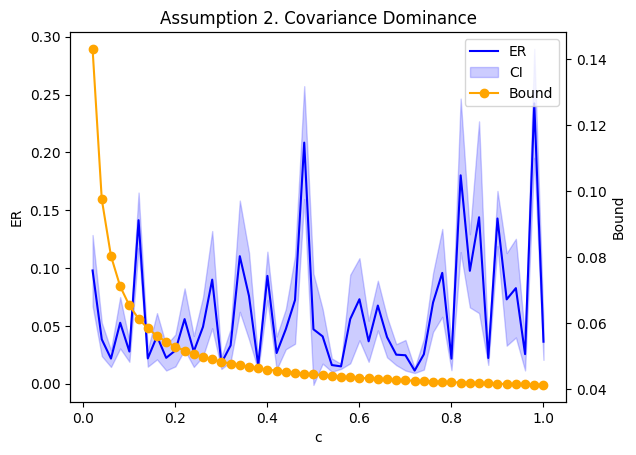

In [19]:
p = plot_result(r_list, 'c', 'ER', 'Assumption 2. Covariance Dominance', y_label="ER", x_label='c')

In [8]:
configs = {
        "d": 120,
        "k": 3,
        "n1": 8000,
        "n2": 80,
        "nT": 100,
        "rho": 1.0,
        "sigma": 0.1,
        "delta": 0.05,
        "c": 1.0,
        "A1": True,
        "A2": True,
        "A3": True,
        "A4": True,
    }
r_list = []
K = np.arange(3, 50, 1)
configs["A3"]=False
for k in K:
    configs["k"]= k
    r = experimentation(
        configs,
        source_max_iter=500,
        target_max_iter=1000).copy()
    r['bound'] = get_bound(r)
    r_list.append(r)

Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 100
Training source tasks
	 Epoch 0 loss:  38.885
	 Epoch 50 loss:  0.549
	 Epoch 100 loss:  0.024
	 Epoch 150 loss:  0.010
	 Epoch 200 loss:  0.010
	 Epoch 237 loss:  0.010
Training target task
Task ID: target_0
	 Epoch 0 loss:  28.183
	 Epoch 50 loss:  2.744
	 Epoch 100 loss:  0.130
	 Epoch 150 loss:  0.012
	 Epoch 170 loss:  0.011
Task ID: target_1
	 Epoch 0 loss:  90.276
	 Epoch 50 loss:  27.208
	 Epoch 100 loss:  8.099
	 Epoch 150 loss:  2.120
	 Epoch 200 loss:  0.497
	 Epoch 250 loss:  0.112
	 Epoch 300 loss:  0.029
	 Epoch 350 loss:  0.012
	 Epoch 400 loss:  0.010
	 Epoch 415 loss:  0.010
Task ID: target_2
	 Epoch 0 loss:  39.348
	 Epoch 50 loss:  2.825
	 Epoch 100 loss:  0.028
	 Epoch 127 loss:  0.010
Task ID: target_3
	 Epoch 0 loss:  41.910
	 Epoch 50 loss:  5.788
	 Epoch 100 loss:  0.212
	 Epoch 150 loss:  0.012
	 Epoch 164 loss:  0.011
Ta

In [30]:
# pickle.dump(r_list, open('r_list.pkl', 'wb'))

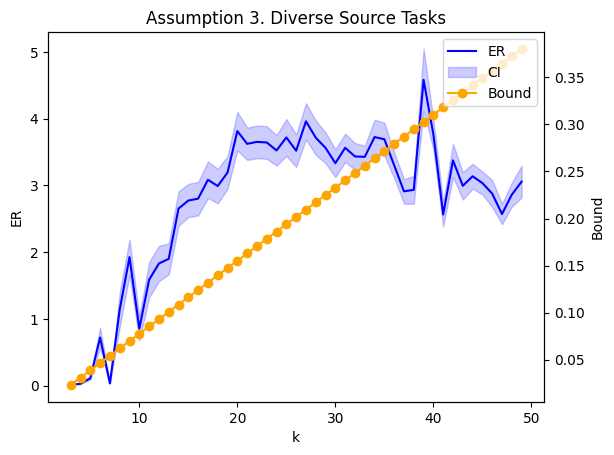

In [28]:
p=plot_result(
    r_list, 
    x_var='k', 
    y_var='ER', 
    title='Assumption 3. Diverse Source Tasks', 
    y_label="ER",
    x_label='k')

  0%|          | 0/47 [00:00<?, ?it/s]

Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 1
Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 1
Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 1
Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 1
Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 1
Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 1
Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 100
Target tasks generated: 1
Parameter assumption

(0.0, 100.0)

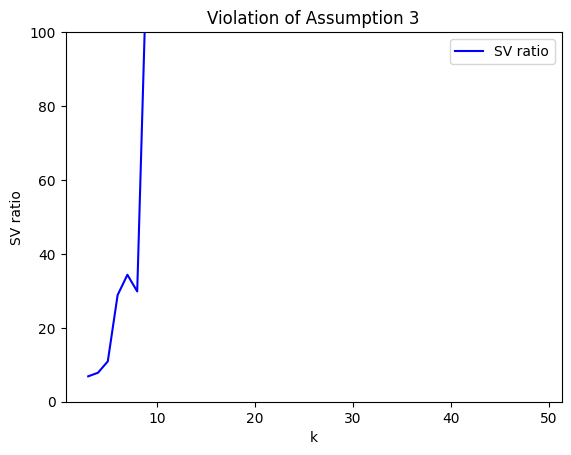

In [20]:
configs = {
        "d": 120,
        "k": 3,
        "n1": 8000,
        "n2": 80,
        "nT": 100,
        "rho": 1.0,
        "sigma": 0.1,
        "delta": 0.05,
        "c": 1.0,
        "A1": True,
        "A2": True,
        "A3": True,
        "A4": True,
    }
r_list = []
K = np.arange(3, 50, 1)
configs["A3"]=False
for k in tqdm(K):
    configs["k"]= k
    exp = Experiment(configs.copy())
    exp.instantiate(1)
    W = torch.stack([t.w for t in exp.source_tasks])
    U, S, V = torch.svd(W)
    configs['cond'] = S.max()/S.min()
    r_list.append(configs.copy())

p = plot_result(
    r_list, 
    x_var='k', 
    y_var='cond', 
    title='Violation of Assumption 3', 
    y_label='SV ratio', 
    x_label='k', 
    show_bound=False,
    conf=False)
plt.ylim(0, 100)